# XGBoost for Finance

conda install -c conda-forge xgboost

In [4]:
import pandas as pd

# Load the pickle file
df =  pd.read_csv("data/nodes_train.csv")


# Get the number of columns
num_columns = df.shape[1]

# Get column names
column_names = df.columns.tolist()

print(f"Number of columns: {num_columns}")
print("Column names:", column_names)


Number of columns: 120
Column names: ['account', 'bank', 'sums_spending_0_27', 'means_spending_0_27', 'medians_spending_0_27', 'stds_spending_0_27', 'maxs_spending_0_27', 'mins_spending_0_27', 'counts_spending_0_27', 'sum_in_0_27', 'mean_in_0_27', 'median_in_0_27', 'std_in_0_27', 'max_in_0_27', 'min_in_0_27', 'count_in_0_27', 'count_unique_in_0_27', 'sum_out_0_27', 'mean_out_0_27', 'median_out_0_27', 'std_out_0_27', 'max_out_0_27', 'min_out_0_27', 'count_out_0_27', 'count_unique_out_0_27', 'sums_spending_15_42', 'means_spending_15_42', 'medians_spending_15_42', 'stds_spending_15_42', 'maxs_spending_15_42', 'mins_spending_15_42', 'counts_spending_15_42', 'sum_in_15_42', 'mean_in_15_42', 'median_in_15_42', 'std_in_15_42', 'max_in_15_42', 'min_in_15_42', 'count_in_15_42', 'count_unique_in_15_42', 'sum_out_15_42', 'mean_out_15_42', 'median_out_15_42', 'std_out_15_42', 'max_out_15_42', 'min_out_15_42', 'count_out_15_42', 'count_unique_out_15_42', 'sums_spending_30_57', 'means_spending_30_57

In [5]:
# Drop the first column (assuming it's an ID column)
df_no_id = df.iloc[:, 2:]  # Keeps everything except the first column

# Separate features (X) and labels (y)
X = df_no_id.iloc[:, :-1]  # All columns except the last one
y = df_no_id.iloc[:, -1]   # Last column as the label

# Verify
print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Column names after removing ID: {X.columns.tolist()}")
print(f"Label column: {y.name}")
X.to_pickle("data/X_train.pkl")
y.to_pickle("data/y_train.pkl")


Features shape: (99987, 117)
Labels shape: (99987,)
Column names after removing ID: ['sums_spending_0_27', 'means_spending_0_27', 'medians_spending_0_27', 'stds_spending_0_27', 'maxs_spending_0_27', 'mins_spending_0_27', 'counts_spending_0_27', 'sum_in_0_27', 'mean_in_0_27', 'median_in_0_27', 'std_in_0_27', 'max_in_0_27', 'min_in_0_27', 'count_in_0_27', 'count_unique_in_0_27', 'sum_out_0_27', 'mean_out_0_27', 'median_out_0_27', 'std_out_0_27', 'max_out_0_27', 'min_out_0_27', 'count_out_0_27', 'count_unique_out_0_27', 'sums_spending_15_42', 'means_spending_15_42', 'medians_spending_15_42', 'stds_spending_15_42', 'maxs_spending_15_42', 'mins_spending_15_42', 'counts_spending_15_42', 'sum_in_15_42', 'mean_in_15_42', 'median_in_15_42', 'std_in_15_42', 'max_in_15_42', 'min_in_15_42', 'count_in_15_42', 'count_unique_in_15_42', 'sum_out_15_42', 'mean_out_15_42', 'median_out_15_42', 'std_out_15_42', 'max_out_15_42', 'min_out_15_42', 'count_out_15_42', 'count_unique_out_15_42', 'sums_spending_3

In [3]:
X.describe()

,sums_spending_0_27,means_spending_0_27,medians_spending_0_27,stds_spending_0_27,maxs_spending_0_27,mins_spending_0_27,counts_spending_0_27,sum_in_0_27,mean_in_0_27,median_in_0_27,...,sum_out_57_84,mean_out_57_84,median_out_57_84,std_out_57_84,max_out_57_84,min_out_57_84,count_out_57_84,count_unique_out_57_84,counts_days_in_bank,counts_phone_changes
count,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000,...,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000,99987.000000,99987.0
mean,22042.874674,1284.127425,507.313375,3234.247473,13871.484704,320.777458,17.364907,1765.428147,471.697577,470.094599,...,1534.913321,490.395536,489.028535,129.087078,616.174653,368.450308,2.390201,1.115295,77.568554,0.0
std,8793.080510,524.466445,30.699980,2088.856792,8616.952915,58.590250,2.568261,3005.827023,342.263907,349.054590,...,2247.342788,342.574169,342.622943,226.172869,580.482168,305.788498,3.279055,1.147211,8.688314,0.0
min,2466.100000,391.744286,370.380000,35.399408,507.790000,2.280000,6.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
25%,16298.435000,939.392389,486.800000,1850.033966,8193.995000,286.700000,16.000000,0.000000,0.000000,0.000000,...,140.445000,114.605000,93.600000,0.000000,127.185000,24.590000,1.000000,1.000000,75.000000,0.0
50%,20897.440000,1202.798947,507.190000,2934.753039,12685.430000,326.380000,17.000000,1103.070000,553.165000,539.070000,...,1111.360000,562.700000,553.030000,53.485557,710.400000,362.350000,2.000000,1.000000,80.000000,0.0
75%,26160.610000,1520.921238,527.760000,4185.435426,17802.750000,360.700000,19.000000,2280.255000,724.126667,729.510000,...,2063.815000,734.020729,740.485000,236.852659,935.360000,581.950000,3.000000,2.000000,83.000000,0.0
max,144247.890000,8167.143571,656.100000,28742.131135,133098.760000,533.760000,29.000000,134889.230000,1728.650000,1728.650000,...,129539.700000,21589.950000,1728.060000,51496.816979,126705.930000,1728.060000,87.000000,71.000000,85.000000,0.0


In [4]:
X.isnull().sum()

sums_spending_0_27        0
means_spending_0_27       0
medians_spending_0_27     0
stds_spending_0_27        0
maxs_spending_0_27        0
                         ..
min_out_57_84             0
count_out_57_84           0
count_unique_out_57_84    0
counts_days_in_bank       0
counts_phone_changes      0
Length: 117, dtype: int64

In [5]:
y.describe()

count    99987.000000
mean         0.016622
std          0.127852
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_sar, dtype: float64

In [6]:
# Check unique values in y
unique_values = y.unique()

if set(unique_values) <= {0, 1}:
    print("y is binary.")
else:
    print(f"y is not binary. Unique values found: {unique_values}")

y is binary.


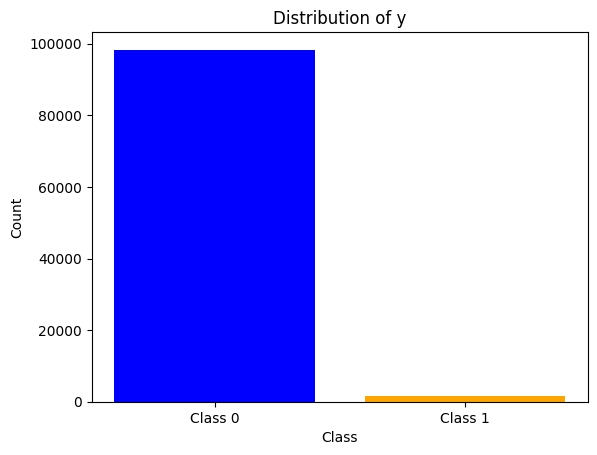

In [7]:
import matplotlib.pyplot as plt

# Count the occurrences of each class (0 and 1)
counts = y.value_counts()

# Create a bar plot
plt.bar(counts.index, counts.values, color=['blue', 'orange'])
plt.xticks([0, 1], labels=['Class 0', 'Class 1'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Distribution of y")
plt.show()

In [8]:
# import XGBoost
import xgboost as xgb


# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [9]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
num_neg = (y_train == 0).sum()
num_pos = (y_train == 1).sum()

scale_pos_weight = num_neg / num_pos
scale_pos_weight

58.616695059625215

In [11]:
# import XGBClassifier
from xgboost import XGBClassifier


# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100,
            'scale_pos_weight': scale_pos_weight,
        }
            
            
            
# instantiate the classifier 
xgb_clf = XGBClassifier(**params)



# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [12]:
# make predictions on test data
y_pred = xgb_clf.predict(X_test)

In [13]:
# check accuracy score
from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

XGBoost model accuracy score: 0.9549


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     29509
         1.0       0.08      0.17      0.11       488

    accuracy                           0.95     29997
   macro avg       0.53      0.57      0.54     29997
weighted avg       0.97      0.95      0.96     29997



In [16]:
from sklearn.metrics import roc_auc_score

y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC-AUC Score: {roc_auc:.4f}')


ROC-AUC Score: 0.6883


## Attacks

In [17]:
from DT_handler import DTInputHandler

from leakpro import LeakPro

# Read the config file
config_path = "audit.yaml"

# Prepare leakpro object
leakpro = LeakPro(DTInputHandler, config_path)

# Run the audit
leakpro.run_audit()

NameError: name 'AdultInputHandler' is not defined